The purpose of this notebook is to collect the images of artworks (with some preprocessing) using the API of the MET. 

In [2]:
import numpy as np
import pandas as pd

In [3]:
#this CSV was given by the API of the MET
df = pd.read_csv('data_loic.csv',sep=",", low_memory=False)

In [4]:
df.head()

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,AccessionYear,Object Name,Title,...,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL,Historical Period
0,10.125.583o,False,False,False,5209,774,European Sculpture and Decorative Arts,1910,Curtain knob,Curtain knob,...,Metalwork,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,Modern Times
1,10.125.583p,False,False,False,5210,NaN,European Sculpture and Decorative Arts,1910,Curtain knob,Curtain knob,...,Metalwork,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",Eagles,http://vocab.getty.edu/page/aat/300250049,https://www.wikidata.org/wiki/Q2092297,Modern Times
2,06.719,False,False,True,7829,NaN,European Sculpture and Decorative Arts,1906,Spoon,Spoon,...,Metalwork,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,Modern Times
3,1976.97,False,False,True,9367,774,Modern and Contemporary Art,1976,Vase,Vase,...,Ceramics,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,Contemporary Era
4,2014.88,False,False,True,21466,NaN,European Sculpture and Decorative Arts,2014,Hanging,Hanging depicting a European conflict in South...,...,Textiles,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",Battles|Soldiers|Horse Riding|Insignia,http://vocab.getty.edu/page/aat/300185692|http...,https://www.wikidata.org/wiki/Q178561|https://...,Modern Times


In [5]:
df.columns

Index(['Object Number', 'Is Highlight', 'Is Timeline Work', 'Is Public Domain',
       'Object ID', 'Gallery Number', 'Department', 'AccessionYear',
       'Object Name', 'Title', 'Culture', 'Period', 'Dynasty', 'Reign',
       'Portfolio', 'Constituent ID', 'Artist Role', 'Artist Prefix',
       'Artist Display Name', 'Artist Display Bio', 'Artist Suffix',
       'Artist Alpha Sort', 'Artist Nationality', 'Artist Begin Date',
       'Artist End Date', 'Artist Gender', 'Artist ULAN URL',
       'Artist Wikidata URL', 'Object Date', 'Object Begin Date',
       'Object End Date', 'Medium', 'Dimensions', 'Credit Line',
       'Geography Type', 'City', 'State', 'County', 'Country', 'Region',
       'Subregion', 'Locale', 'Locus', 'Excavation', 'River', 'Classification',
       'Rights and Reproduction', 'Link Resource', 'Object Wikidata URL',
       'Metadata Date', 'Repository', 'Tags', 'Tags AAT URL',
       'Tags Wikidata URL', 'Historical Period'],
      dtype='object')

In [6]:
len(df["Culture"].unique())

6968

In [7]:
df["Culture"].unique()[:10]

array(['probably American', 'Flemish', 'American',
       'Indian, Coromandel Coast, for British market', 'Anglo-American',
       'Japanese', 'French', 'Malaysian', 'German', 'Spanish or Italian'],
      dtype=object)

# Preprocessing

In [8]:
def prep_culture(df):
    
    liste = []
    for val in df['Culture']:
        temp = val.split()
        if len(temp)==1:
            liste.append(val)
        elif 'for ' in val :
            temp = val.split(',')
            if 'ilt' in val:
                temp = temp[1].split()
                liste.append(temp[0])
            else :        
                temp = temp[0].split('(')
                temp = temp[0].split('with') 
                temp = temp[0].split('for') 
                temp = temp[0].split()
                if 'robably' in temp[0] or 'ossibly' in temp[0]:     
                    liste.append(" ".join(temp[1:]))
                else : liste.append(temp[0])             
        elif len(temp)==2 and ('robably' in val or 'ossibly' in val):
            if 'robably' not in temp[0] and 'ossibly' not in temp[0]:
                temp = temp[0].split(',')
                liste.append(temp[0])
            else : liste.append(temp[1])     
        elif len(temp)==2:
            temp = temp[0].split(',')
            liste.append(temp[0])
        elif '(' in val and 'arket' not in val and 'or ' not in val:
            temp = val.split('(')
            temp = temp[0].split(',')
            temp = temp[0].split(';')
            temp = temp[0].split()
            if 'robably' in temp[0] or 'ossibly' in temp[0]:     
                liste.append(" ".join(temp[1:]))
            else : liste.append(temp[0])       
        elif ' or ' in val and '(' not in val: #several cultuer given
            temp = val.split(', ')
            
            if 'robably' in temp[0] or 'ossibly' in temp[0]: 
                temp = temp[0].split()
                liste.append(" ".join(temp[1:]))
            elif 'ilt' not in temp[0] : 
                liste.append(temp[0])
            else:
                temp = temp[1].split(';')
                liste.append(temp[0])
                
        elif 'arket' in val : #to remove the market and keep the original culture
            temp = val.split(',')
            temp = temp[0].split('(') 
            temp = temp[0].split('for')
            temp = temp[0].split('with')  
            temp = temp[0].split()
            if 'robably' in temp[0] or 'ossibly' in temp[0]:                 
                liste.append(" ".join(temp[1:]))
            else : liste.append(temp[0]) 

        else :    
            temp = val.split(';')
            temp = temp[0].split(', ')       
            if 'ilt' in temp[0]: 
                if 'robably' in (" ".join(temp[1:])) or 'ossibly' in (" ".join(temp[1:])):
                    temp = (" ".join(temp[1:])).split()
                    if 'robably' in temp[0] or 'ossibly' in temp[0]:                 
                        liste.append(" ".join(temp[1:]))
                    else : liste.append(temp[0])
                else : liste.append(" ".join(temp[1:]))
                
            else : 
                temp = temp[0].split('(') 
                temp = temp[0].split(':') 
                temp = temp[0].split('with') 
                temp = temp[0].split() 
                if 'robably' in temp[0] or 'ossibly' in temp[0]:                 
                    liste.append(" ".join(temp[1:]))
                else : liste.append(temp[0])
                
    return liste

In [9]:
df = df.dropna(axis=0, subset=['Medium', 'Classification','Dimensions','Culture','Object Begin Date'])
Culture = prep_culture(df)
df['Culture']=Culture
print(len(np.unique(Culture)))
print(np.unique(Culture)[:30])

2128
['"Peking"' 'Abau' 'Abelam' 'Abenaki' 'Abor' 'Abron' 'Acehnese'
 'Achaemenid' 'Achaemenid or Seleucid' 'Acheen' 'Acheulean' 'Acoma'
 'Adjora or Aion' 'Adjora or Kopar' 'Admiralty' 'Aduma' 'Aegean' 'Afghan'
 'Afghan or Persian' 'Afghanistan' 'Afghanistan or Central Asia'
 'Afghanistani' 'Africa' 'African' 'Afro-Ecuadorian' 'Aguada' 'Akan'
 'Akimel' 'Akkadian' 'Akkadian or Neo-Sumerian']


There are too much cultures... Let's filter them

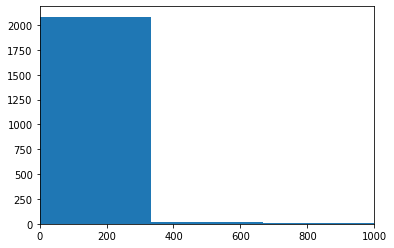

In [10]:
import matplotlib.pyplot as plt
counts = [Culture.count(s) for s in np.unique(Culture)]
plt.hist(counts, bins=50)
plt.xlim(0, 1000)
plt.show()

Below 500 images for a culture is not enough ...

In [11]:
n = 0
cultures_filtered = []
for s in np.unique(Culture):
    if (" or " in s) or ("probably" in s) or ("possibly" in s) or (Culture.count(s) < 500):
        pass
    else:
        n+=1
        cultures_filtered.append(s)
print("Number of culture to keep", n)
print(cultures_filtered)

Number of culture to keep 35
['American', 'Asmat', 'Austrian', 'British', 'Byzantine', 'China', 'Chinese', 'Coptic', 'Cypriot', 'Dutch', 'Etruscan', 'European', 'Flemish', 'Frankish', 'French', 'German', 'Greek', 'India', 'Indian', 'Indonesia', 'Iran', 'Italian', 'Japan', 'Japanese', 'Korea', 'Mexican', 'Minoan', 'Moche', 'Roman', 'Russian', 'Sasanian', 'South', 'Spanish', 'Swiss', 'Thailand']


* Chinese <-> China
* Indian<-> India
* Japan<->Japenese
* Dutch<->German
* Frankish<->French
* Sasanian<->Iran
* Minoan<->Greek
* Italian<->Etruscan<->Roman
* Remove European (too vague)
* Remove Asmat, North, South, Cypriot, Coptic 

In [12]:
Culture_filtered = []
for culture in Culture:
    if culture=="China":
        Culture_filtered.append("Chinese")
    elif culture=="India":
        Culture_filtered.append("Indian")
    elif culture=="Japan":
        Culture_filtered.append("Japenese")
    elif culture=="Dutch":
        Culture_filtered.append("German")
    elif culture=="Frankish":
        Culture_filtered.append("French")
    elif culture=="Sasanian":
        Culture_filtered.append("Iran")
    elif culture=="Minoan":
        Culture_filtered.append("Greek")
    elif culture=="Roman" or culture=="Etruscan":
        Culture_filtered.append("Italian")
    elif culture in ["European", "Asmat", "North", "South", "Cypriot", "Coptic"]:
        Culture_filtered.append("remove")
    elif culture in cultures_filtered:
        Culture_filtered.append(culture)
    else:
        Culture_filtered.append("remove")

In [13]:
print(len(np.unique(Culture_filtered)))
print(np.unique(Culture_filtered))

23
['American' 'Austrian' 'British' 'Byzantine' 'Chinese' 'Flemish' 'French'
 'German' 'Greek' 'Indian' 'Indonesia' 'Iran' 'Italian' 'Japanese'
 'Japenese' 'Korea' 'Mexican' 'Moche' 'Russian' 'Spanish' 'Swiss'
 'Thailand' 'remove']


In [14]:
# remove the samples if their culture is "remove"
df["Culture_filtered"] = Culture_filtered
df_filtered = df[df['Culture_filtered']!="remove"]
df_filtered.shape[0]

103490

In [15]:
df_filtered["Culture_filtered"].unique()

array(['American', 'Flemish', 'Indian', 'Japanese', 'French', 'German',
       'Italian', 'Spanish', 'Austrian', 'British', 'Swiss', 'Chinese',
       'Russian', 'Mexican', 'Greek', 'Byzantine', 'Japenese', 'Korea',
       'Thailand', 'Indonesia', 'Iran', 'Moche'], dtype=object)

In [16]:
df_images = df_filtered[df_filtered['Is Public Domain']]
df_images.shape

(82252, 56)

In [17]:
cultures_to_keep = df_filtered["Culture_filtered"].unique()

dico_dfs = {}

for culture_to_keep in cultures_to_keep:
    dico_dfs[culture_to_keep] = df_images[(df_images['Object ID'] > 0) & (df_images['Culture_filtered']==culture_to_keep)]

In [18]:
for culture_to_keep in cultures_to_keep:
    dico_dfs[culture_to_keep] = dico_dfs[culture_to_keep][["Object ID", "Culture_filtered"]]

In [19]:
cultures_image_ok = []
for culture_to_keep in cultures_to_keep:
    data_culture = dico_dfs[culture_to_keep]
    n_img = data_culture.shape[0]
    if n_img > 1000:
        cultures_image_ok.append(culture_to_keep)

print(cultures_image_ok)

['Indian', 'Japanese', 'French', 'German', 'Italian', 'Spanish', 'British', 'Chinese', 'Greek', 'Japenese', 'Iran']


In [20]:
dico_dfs = {k:v for (k,v) in dico_dfs.items() if k in cultures_image_ok} 

In [28]:
n_tot = np.sum([len(dico_dfs[culture_to_keep]) for culture_to_keep in cultures_image_ok])

for culture_to_keep in cultures_image_ok:
    print(culture_to_keep, ":", 100*len(dico_dfs[culture_to_keep])/ n_tot, "%")

Indian : 2.184013650085313
Japanese : 3.316708229426434
French : 15.324845780286127
German : 8.100800630003938
Italian : 17.08360677254233
Spanish : 1.9963249770311065
British : 8.203176269851687
Chinese : 15.757973487334295
Greek : 5.708098175613598
Japenese : 19.733560834755217
Iran : 2.5908911930699565


In [21]:
num_samples = 1000

dico_cultures = {}

for culture_to_keep in cultures_image_ok:
    dico_cultures[culture_to_keep] = dico_dfs[culture_to_keep].sample(n=num_samples, random_state=42)



In [22]:
import os
import urllib.request
import requests

In [23]:
def save_images(folder,df):
    n = df.shape[0]
    if not os.path.exists(folder):
        os.makedirs(folder)
    os.chdir(folder)
    for i in range(n):
        Id = df.iloc[i]['Object ID']
        url = 'https://collectionapi.metmuseum.org/public/collection/v1/objects/'+str(Id)
        #r = requests.get(url)
        try:
            #urlopen(url)
            r = requests.get(url)
            url_image = r.json()['primaryImageSmall']
            name = folder+"_"+str(Id)+".jpg"
            urllib.request.urlretrieve(url_image, name)  
            r.close()
        except:
            print(i)
            pass

    os.chdir('C:\\Users\\MARY Loïc\\Desktop\\PROJET MUSEE')


In [24]:
for culture_to_keep in cultures_image_ok:
    save_images(culture_to_keep, dico_cultures[culture_to_keep])
    print("ok")


print("Finish !")

11
25
35
73
116
130
156
171
208
381
424
582
692
762
836
853
949
953
959
970
ok
83
143
316
430
453
589
600
691
705
807
ok
131
200
458
521
534
773
839
ok
166
337
860
ok
627
ok
107
133
150
343
393
572
673
912
947
ok
82
248
254
274
306
338
381
458
523
546
582
784
842
857
ok
21
71
161
317
426
686
853
ok
399
420
570
617
619
794
850
998
ok
38
237
477
ok
184
292
331
333
385
492
632
671
789
807
834
941
ok
Finish !
